# Spectrum Anomaly Detection for Optical Network Monitoring using Deep Unsupervised Learning

**Authors:** [Carlos Natalino](https://www.chalmers.se/en/staff/Pages/Carlos-Natalino-Da-Silva.aspx)\*, Aleksejs Udalcovs\*\*, Lena Wosinska\*, Oskars Ozolins\*\*, [Marija Furdek](https://www.chalmers.se/en/staff/Pages/Marija-Furdek-Prekratic.aspx)\*

\* Department of Electrical Engineering, Chalmers University of Technology, Gothenburg, Sweden (e-mail: carlos.natalino@chalmers.se, wosinska@chalmers.se, furdek@chalmers.se).

\*\* RISE Research Institutes of Sweden, Kista, Sweden (e-mail: aleksejs.udalcovs@ri.se, oskars.ozolins@ri.se).

## Plotting the final results

In [1]:
import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman', 'Times']
rcParams['font.size'] = 20

## Autoencoder training performance

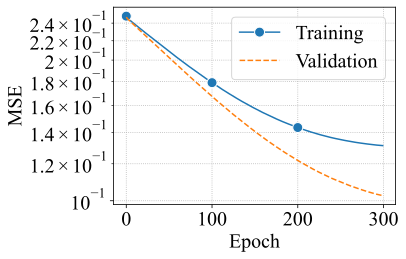

In [2]:
with open('models/training_history_autoencoder.h5', 'rb') as f:
    history = pickle.load(f)

metrics = [x for x in history.keys() if 'val' not in x]
plt.semilogy(history['mse'][:300], label='Training', marker='o', markevery=100, markersize=10, markeredgecolor='white')
plt.semilogy(history['val_mse'][:300], label='Validation', ls='--')

plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.grid(True, which='both', ls=':')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/training_autoencoder.pdf')
plt.savefig('figures/training_autoencoder.svg')
plt.show()
plt.close()

## Accuracy results for the 64QAM@40dB case

In [3]:
with open('models/performance-metrics.h5', 'rb') as f:
    data = pickle.load(f)    
    performance_dbscan_full = data['performance_dbscan_full']
    performance_dbscan_encoded = data['performance_dbscan_encoded']
    performance_ocsvm_full = data['performance_ocsvm_full']
    performance_ocsvm_encoded = data['performance_ocsvm_encoded']

In [4]:
# helper functions
def get_sorted_pairs_ocsvm(performance):
    '''
    returns a list of vectors sorted by the false positive rate
    '''
    values = sorted([performance[kernel][nu][gamma] for kernel in performance for nu in performance[kernel] for gamma in performance[kernel][nu]], key=lambda x: x['false_positive_rate'])
    return values

def get_sorted_pairs_dbscan(performance):
    values = sorted([performance[min_samples][epsilon] for min_samples in performance for epsilon in performance[min_samples]], key=lambda x: x['false_positive_rate'])
    return values

In [5]:
# OCSVM full
best_configs_ocsvm_full = []

sorted_pairs = get_sorted_pairs_ocsvm(performance_ocsvm_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('Best performance full:',best_fpr, best_fnr, best_f1)

best_f1_score_ocsvm_full = best_f1
best_rate_ocsvm_full = (best_fpr, best_fnr)
for kernel in performance_ocsvm_full:
    for nu in performance_ocsvm_full[kernel]:
        for gamma in performance_ocsvm_full[kernel][nu]:
            if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] == best_fpr and \
                performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] == best_fnr:
                best_configs_ocsvm_full.append((kernel, gamma, nu))
print('{:.3f}'.format(best_f1), best_rate_ocsvm_full, [x for x in best_configs_ocsvm_full])

Best performance full: 0.07 0.0 0.9661835748792269
0.966 (0.07, 0.0) [('linear', 0.001, 0.01), ('linear', 0.1, 0.01), ('linear', 0.2, 0.01), ('linear', 0.5, 0.01), ('linear', 0.7, 0.01), ('linear', 1.0, 0.01)]


In [6]:
# OCSVM encoded
best_configs_ocsvm_encoded = []

sorted_pairs = get_sorted_pairs_ocsvm(performance_ocsvm_encoded)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('Best performance encoded:',best_fpr, best_fnr, best_f1)

best_f1_score_ocsvm_encoded = best_f1
best_rate_ocsvm_encoded = (best_fpr, best_fnr)
for kernel in performance_ocsvm_encoded:
    for nu in performance_ocsvm_encoded[kernel]:
        for gamma in performance_ocsvm_encoded[kernel][nu]:
            if performance_ocsvm_encoded[kernel][nu][gamma]['false_positive_rate'] == best_fpr and \
                performance_ocsvm_encoded[kernel][nu][gamma]['false_negative_rate'] == best_fnr:
                best_configs_ocsvm_encoded.append((kernel, gamma, nu))
print('{:.3f}'.format(best_f1), best_rate_ocsvm_encoded, [x for x in best_configs_ocsvm_encoded])

Best performance encoded: 0.02 0.0 0.9900990099009899
0.990 (0.02, 0.0) [('rbf', 0.1, 0.01), ('rbf', 0.2, 0.01)]


In [7]:
# DBSCAN full
best_configs_dbscan_full = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('Best performance DBSCAN full:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_full = best_f1
best_rate_dbscan_full = (best_fpr, best_fnr)
for min_samples in performance_dbscan_full:
    for epsilon in performance_dbscan_full[min_samples]:
        if performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_full.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_full, [x for x in best_configs_dbscan_full])

Best performance DBSCAN full: 1.0 0.0 0.6666666666666665
0.667 (1.0, 0.0) [(4, 0.1), (4, 1.0), (4, 1.5), (4, 2.0), (4, 2.5), (4, 3.0), (4, 4.0), (4, 5.0), (4, 10.0), (8, 0.1), (8, 0.5), (8, 1.0), (8, 1.5), (8, 2.0), (8, 2.5), (8, 3.0), (8, 4.0), (8, 5.0), (8, 10.0), (10, 0.1), (10, 0.5), (10, 1.0), (10, 1.5), (10, 2.0), (10, 2.5), (10, 3.0), (10, 4.0), (10, 5.0), (10, 10.0), (12, 0.1), (12, 0.5), (12, 1.0), (12, 1.5), (12, 2.0), (12, 2.5), (12, 3.0), (12, 4.0), (12, 5.0), (12, 10.0), (15, 0.1), (15, 0.5), (15, 1.0), (15, 1.5), (15, 2.0), (15, 2.5), (15, 3.0), (15, 4.0), (15, 5.0), (15, 10.0), (20, 0.1), (20, 0.5), (20, 1.0), (20, 1.5), (20, 2.0), (20, 2.5), (20, 3.0), (20, 4.0), (20, 5.0), (20, 10.0), (30, 0.1), (30, 0.5), (30, 1.0), (30, 1.5), (30, 2.0), (30, 2.5), (30, 3.0), (30, 4.0), (30, 5.0), (30, 10.0), (40, 0.1), (40, 0.5), (40, 1.0), (40, 1.5), (40, 2.0), (40, 2.5), (40, 3.0), (40, 4.0), (40, 5.0), (40, 10.0), (50, 0.1), (50, 0.5), (50, 1.0), (50, 1.5), (50, 2.0), (50, 2.5), (

In [8]:
# DBSCAN full
best_configs_dbscan_encoded = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_encoded)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('Best performance DBSCAN encoded:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_encoded = best_f1
best_rate_dbscan_encoded = (best_fpr, best_fnr)
for min_samples in performance_dbscan_encoded:
    for epsilon in performance_dbscan_encoded[min_samples]:
        if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_encoded.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_encoded, [x for x in best_configs_dbscan_encoded])

Best performance DBSCAN encoded: 0.0 0.0 1.0
1.000 (0.0, 0.0) [(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0)]


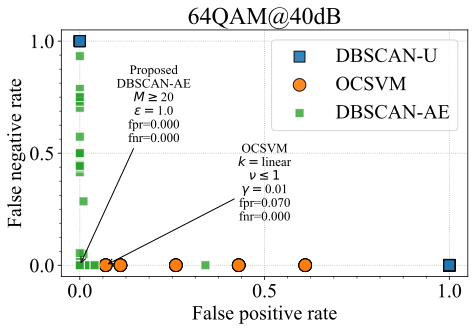

In [9]:
plt.figure(figsize=(7,5))

plt.scatter([performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           [performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           marker='s', label='DBSCAN-U', s=120, alpha=.9, edgecolors='black', zorder=5)

ax = plt.scatter([performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.], 
             [performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.],
           marker='o', label='OCSVM', s=160, alpha=.9, edgecolors='black', zorder=10)

plt.scatter([performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           [performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           marker='s', label='DBSCAN-AE', s=80, alpha=.8, edgecolors='white', zorder=30)

font_offset = -7.

# points of the OCSVM
best_config_ocsvm_full = best_configs_ocsvm_full[0]
plt.annotate(r'OCSVM'
             '\n'
             '$k{=}$'
             f'{best_config_ocsvm_full[0]}'
             '\n'
             r'$\nu{\leq}1$'
             '\n'
             r'$\gamma{=}$0.01'
             '\n'
             f'fpr={best_rate_ocsvm_full[0]:.3f}'
             '\n'
             f'fnr={best_rate_ocsvm_full[1]:.3f}', best_rate_ocsvm_full, 
             (.5, .2), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)

best_config_dbscan_encoded = best_configs_dbscan_encoded[0]
plt.annotate(r'Proposed' '\n' 'DBSCAN-AE'
             '\n'
             '$M{\geq}$20'
             '\n'
             r'$\epsilon{=}$'
             f'{best_config_dbscan_encoded[1]}'
             '\n'
             f'fpr={best_rate_dbscan_encoded[0]:.3f}'
             '\n'
             f'fnr={best_rate_dbscan_encoded[1]:.3f}', 
             best_rate_dbscan_encoded, (.2, .55), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)

plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.grid(True, ls=':')
plt.xticks([0, .5, 1.])
plt.yticks([0, .5, 1.])
plt.title('64QAM@40dB')
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
# plt.gca().tick_params(which='minor', length=4)
frame = plt.legend(loc='upper right', frameon=1)
frame.set_alpha(1.)
frame.set_zorder(100)
plt.tight_layout()
# plt.subplots_adjust(left=0.11, bottom=0.14, right=.99, top=.99, 
#                     wspace=0, hspace=0.0)
plt.savefig('figures/falses-algorithms.pdf')
plt.savefig('figures/falses-algorithms.svg')
plt.show()
plt.close()

## Run time performance

In [10]:
with open('models/performance-runtime.h5', 'rb') as f:
    results_run_time = pickle.load(f)
time_ocsvm_full = results_run_time['ocsvm_full']
time_ocsvm_encoded = results_run_time['ocsvm_encoded']
time_dbscan_full = results_run_time['dbscan_full']
time_dbscan_encoded = results_run_time['dbscan_encoded']

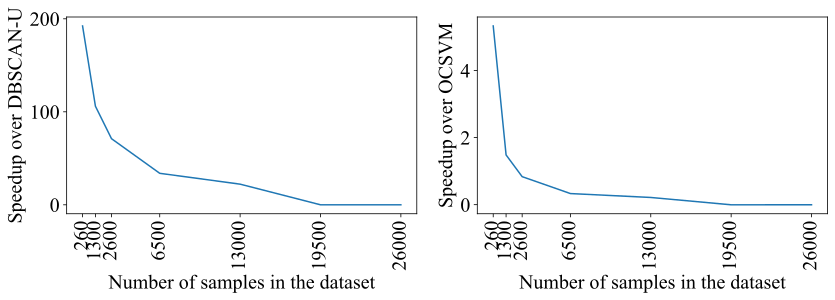

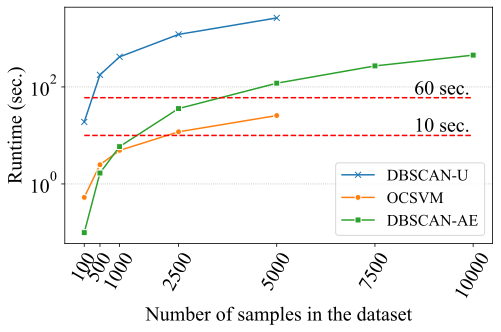

In [11]:
plt.figure(figsize=(12, 4.5))

plt.subplot(1, 2, 1)
plt.plot([key * (2 + 3/5) for key, data in time_dbscan_full.items()], [time_dbscan_full[key] / time_dbscan_encoded[key] for key, data in time_dbscan_full.items()], label='Full')
plt.xticks([key * (2 + 3/5) for key, data in time_dbscan_encoded.items()])
plt.xlabel('Number of samples in the dataset')
plt.ylabel('Speedup over DBSCAN-U')
plt.xticks([key * (2 + 3/5) for key, data in time_dbscan_encoded.items()], rotation=90)

plt.subplot(1, 2, 2)
plt.plot([key * (2 + 3/5) for key, data in time_dbscan_full.items()], [time_ocsvm_full[key] / time_dbscan_encoded[key] for key, data in time_dbscan_full.items()], label='OC SVM')
plt.xticks([key * (2 + 3/5) for key, data in time_dbscan_encoded.items()])
# plt.gca().set_yscale('log')
plt.xlabel('Number of samples in the dataset')
plt.ylabel('Speedup over OCSVM')
plt.xticks([key * (2 + 3/5) for key, data in time_dbscan_encoded.items()], rotation=90)

plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(7,4.5))

plt.plot([key for key, data in time_dbscan_full.items() if data > 0], [data for key, data in time_dbscan_full.items() if data > 0], label='DBSCAN-U', marker='x')

plt.plot([key for key, data in time_ocsvm_full.items() if data > 0], [data for key, data in time_ocsvm_full.items() if data > 0], label='OCSVM', marker='o', markeredgecolor='white')

plt.plot([key for key, data in time_dbscan_encoded.items()], [data for key, data in time_dbscan_encoded.items()], label='DBSCAN-AE', marker='s', markeredgecolor='white')


plt.plot([key for key, data in time_dbscan_encoded.items()], [60 for key, data in time_dbscan_encoded.items()], ls='--', color='red')
plt.plot([key for key, data in time_dbscan_encoded.items()], [10 for key, data in time_dbscan_encoded.items()], ls='--', color='red')

max_x = max([key for key, data in time_dbscan_encoded.items()]) - 1500
plt.text(max_x, 12, '10 sec.')
plt.text(max_x, 70, '60 sec.')

plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')
plt.grid(True, ls=':', axis='y', lw='.8')
plt.legend(loc='lower right', fontsize=16)
plt.xticks([key for key, data in time_dbscan_encoded.items()], rotation=60)
plt.xlabel('Number of samples in the dataset')
plt.ylabel('Runtime (sec.)')
# plt.tight_layout()
plt.subplots_adjust(left=0.14, bottom=0.26, right=.99, top=.99, 
                    wspace=0, hspace=0.0)
plt.savefig('figures/runtime.pdf')
plt.savefig('figures/runtime.svg')
plt.show()

## Other modulation formats

### 16QAM@25dB

In [12]:
with open('models/performance-metrics_16QAM_25dB.h5', 'rb') as f:
    data = pickle.load(f)    
    performance_dbscan_full = data['performance_dbscan_full']
    performance_dbscan_encoded = data['performance_dbscan_encoded']
    performance_ocsvm_full = data['performance_ocsvm_full']
    performance_ocsvm_encoded = data['performance_ocsvm_encoded']

In [13]:
# DBSCAN full
best_configs_dbscan_encoded = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_encoded)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('Best performance DBSCAN encoded:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_encoded = best_f1
best_rate_dbscan_encoded = (best_fpr, best_fnr)
for min_samples in performance_dbscan_encoded:
    for epsilon in performance_dbscan_encoded[min_samples]:
        if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_encoded.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_encoded, [x for x in best_configs_dbscan_encoded])

# DBSCAN full
best_configs_dbscan_full = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('\nBest performance DBSCAN full:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_full = best_f1
best_rate_dbscan_full = (best_fpr, best_fnr)
for min_samples in performance_dbscan_full:
    for epsilon in performance_dbscan_full[min_samples]:
        if performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_full.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_full, [x for x in best_configs_dbscan_full])

sorted_pairs = get_sorted_pairs_ocsvm(performance_ocsvm_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('\nBest performance OCSVM full:',best_fpr, best_fnr, best_f1)

best_f1_score_ocsvm_full = best_f1
best_rate_ocsvm_full = (best_fpr, best_fnr)
for kernel in performance_ocsvm_full:
    for nu in performance_ocsvm_full[kernel]:
        for gamma in performance_ocsvm_full[kernel][nu]:
            if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] == best_fpr and \
                performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] == best_fnr:
                best_configs_ocsvm_full.append((kernel, gamma, nu))
print('{:.3f}'.format(best_f1), best_rate_ocsvm_full, [str(x) for x in best_configs_ocsvm_full])

Best performance DBSCAN encoded: 0.03000000000000001 0.0 0.9852216748768471
0.985 (0.03000000000000001, 0.0) [(10, 0.5), (12, 0.5), (15, 0.5), (20, 0.5)]

Best performance DBSCAN full: 1.0 0.0 0.6666666666666665
0.667 (1.0, 0.0) [(4, 0.1), (4, 1.0), (4, 1.5), (4, 2.0), (4, 2.5), (4, 3.0), (4, 4.0), (4, 5.0), (4, 10.0), (8, 0.1), (8, 0.5), (8, 1.0), (8, 1.5), (8, 2.0), (8, 2.5), (8, 3.0), (8, 4.0), (8, 5.0), (8, 10.0), (10, 0.1), (10, 0.5), (10, 1.0), (10, 1.5), (10, 2.0), (10, 2.5), (10, 3.0), (10, 4.0), (10, 5.0), (10, 10.0), (12, 0.1), (12, 0.5), (12, 1.0), (12, 1.5), (12, 2.0), (12, 2.5), (12, 3.0), (12, 4.0), (12, 5.0), (12, 10.0), (15, 0.1), (15, 0.5), (15, 1.0), (15, 1.5), (15, 2.0), (15, 2.5), (15, 3.0), (15, 4.0), (15, 5.0), (15, 10.0), (20, 0.1), (20, 0.5), (20, 1.0), (20, 1.5), (20, 2.0), (20, 2.5), (20, 3.0), (20, 4.0), (20, 5.0), (20, 10.0), (30, 0.1), (30, 0.5), (30, 1.0), (30, 1.5), (30, 2.0), (30, 2.5), (30, 3.0), (30, 4.0), (30, 5.0), (30, 10.0), (40, 0.1), (40, 0.5), (

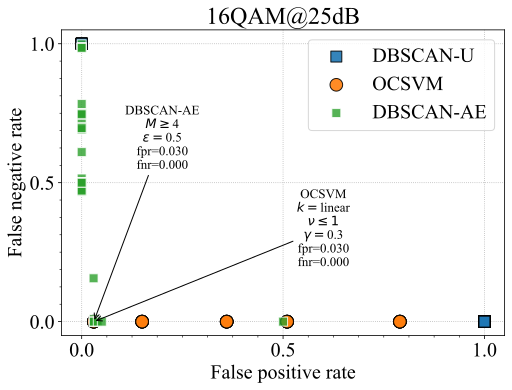

In [14]:
plt.figure(figsize=(7,5))

plt.scatter([performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           [performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           marker='s', label='DBSCAN-U', s=120, alpha=.9, edgecolors='black', zorder=5)

ax = plt.scatter([performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.], 
             [performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.],
           marker='o', label='OCSVM', s=160, alpha=.9, edgecolors='black', zorder=10)

plt.scatter([performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           [performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           marker='s', label='DBSCAN-AE', s=80, alpha=.8, edgecolors='white', zorder=30)

font_offset = -7.

# points of the OCSVM
best_config_ocsvm_full = best_configs_ocsvm_full[0]
plt.annotate(r'OCSVM'
             '\n'
             '$k{=}$'
             f'{best_config_ocsvm_full[0]}'
             '\n'
             r'$\nu{\leq}1$'
             '\n'
             r'$\gamma{=}$0.3'
             '\n'
             f'fpr={best_rate_ocsvm_full[0]:.3f}'
             '\n'
             f'fnr={best_rate_ocsvm_full[1]:.3f}', best_rate_ocsvm_full, 
             (.6, .2), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)


best_config_dbscan_encoded = best_configs_dbscan_encoded[0]
plt.annotate(r'DBSCAN-AE'
             '\n'
             '$M{\geq}$4'
             '\n'
             r'$\epsilon{=}$'
             f'{best_config_dbscan_encoded[1]}'
             '\n'
             f'fpr={best_rate_dbscan_encoded[0]:.3f}'
             '\n'
             f'fnr={best_rate_dbscan_encoded[1]:.3f}', 
             best_rate_dbscan_encoded, (.2, .55), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)

plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.grid(True, ls=':')
plt.xticks([0, .5, 1.])
plt.yticks([0, .5, 1.])
plt.title('16QAM@25dB')
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
# plt.gca().tick_params(which='minor', length=4)
frame = plt.legend(loc='upper right', frameon=1)
frame.set_alpha(1.)
frame.set_zorder(100)
# plt.tight_layout()
plt.subplots_adjust(left=0.11, bottom=0.14, right=.99, top=.99, 
                    wspace=0, hspace=0.0)
plt.savefig('figures/falses-algorithms_16QAM_25dB.pdf')
plt.savefig('figures/falses-algorithms_16QAM_25dB.svg')
plt.show()

In [15]:
with open('models/performance-metrics_64QAM_40dB.h5', 'rb') as f:
    data = pickle.load(f)    
    performance_dbscan_full = data['performance_dbscan_full']
    performance_dbscan_encoded = data['performance_dbscan_encoded']
    performance_ocsvm_full = data['performance_ocsvm_full']
    performance_ocsvm_encoded = data['performance_ocsvm_encoded']

In [16]:
# DBSCAN full
best_configs_dbscan_encoded = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_encoded)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('\nBest performance DBSCAN encoded:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_encoded = best_f1
best_rate_dbscan_encoded = (best_fpr, best_fnr)
for min_samples in performance_dbscan_encoded:
    for epsilon in performance_dbscan_encoded[min_samples]:
        if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_encoded.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_encoded, [x for x in best_configs_dbscan_encoded])

# DBSCAN full
best_configs_dbscan_full = []

sorted_pairs = get_sorted_pairs_dbscan(performance_dbscan_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('\nBest performance DBSCAN full:',best_fpr, best_fnr, best_f1)

best_f1_score_dbscan_full = best_f1
best_rate_dbscan_full = (best_fpr, best_fnr)
for min_samples in performance_dbscan_full:
    for epsilon in performance_dbscan_full[min_samples]:
        if performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] == best_fpr and \
            performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] == best_fnr:
            best_configs_dbscan_full.append((min_samples, epsilon))
print('{:.3f}'.format(best_f1), best_rate_dbscan_full, [x for x in best_configs_dbscan_full])


best_configs_ocsvm_full = []

sorted_pairs = get_sorted_pairs_ocsvm(performance_ocsvm_full)

best_fpr = 1.
best_fnr = 1.
best_f1 = 0.
for p in sorted_pairs:
    fpr = p['false_positive_rate']
    fnr = p['false_negative_rate']
    f1 = p['f1_score']
    if f1 > best_f1:
        best_fpr = fpr
        best_fnr = fnr
        best_f1 = f1
print('\nBest performance OCSVM full:',best_fpr, best_fnr, best_f1)

best_f1_score_ocsvm_full = best_f1
best_rate_ocsvm_full = (best_fpr, best_fnr)
for kernel in performance_ocsvm_full:
    for nu in performance_ocsvm_full[kernel]:
        for gamma in performance_ocsvm_full[kernel][nu]:
            if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] == best_fpr and \
                performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] == best_fnr:
                best_configs_ocsvm_full.append((kernel, gamma, nu))
print('{:.3f}'.format(best_f1), best_rate_ocsvm_full, [x for x in best_configs_ocsvm_full])


Best performance DBSCAN encoded: 0.42 0.0 0.8264462809917356
0.826 (0.42, 0.0) [(4, 0.1), (8, 0.1), (10, 0.1), (12, 0.1), (15, 0.1), (20, 0.1), (30, 0.1), (40, 0.1), (50, 0.1)]

Best performance DBSCAN full: 1.0 0.0 0.6666666666666665
0.667 (1.0, 0.0) [(4, 0.1), (4, 1.0), (4, 1.5), (4, 2.0), (4, 2.5), (4, 3.0), (4, 4.0), (4, 5.0), (4, 10.0), (8, 0.1), (8, 0.5), (8, 1.0), (8, 1.5), (8, 2.0), (8, 2.5), (8, 3.0), (8, 4.0), (8, 5.0), (8, 10.0), (10, 0.1), (10, 0.5), (10, 1.0), (10, 1.5), (10, 2.0), (10, 2.5), (10, 3.0), (10, 4.0), (10, 5.0), (10, 10.0), (12, 0.1), (12, 0.5), (12, 1.0), (12, 1.5), (12, 2.0), (12, 2.5), (12, 3.0), (12, 4.0), (12, 5.0), (12, 10.0), (15, 0.1), (15, 0.5), (15, 1.0), (15, 1.5), (15, 2.0), (15, 2.5), (15, 3.0), (15, 4.0), (15, 5.0), (15, 10.0), (20, 0.1), (20, 0.5), (20, 1.0), (20, 1.5), (20, 2.0), (20, 2.5), (20, 3.0), (20, 4.0), (20, 5.0), (20, 10.0), (30, 0.1), (30, 0.5), (30, 1.0), (30, 1.5), (30, 2.0), (30, 2.5), (30, 3.0), (30, 4.0), (30, 5.0), (30, 10.0),

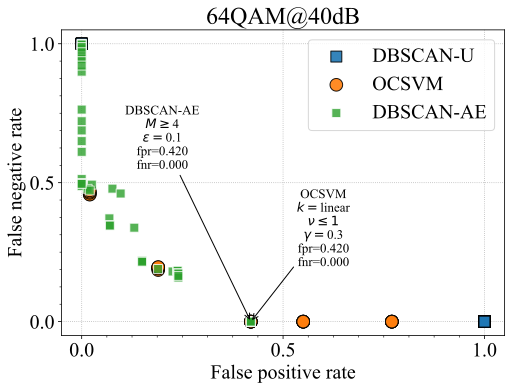

In [18]:
plt.figure(figsize=(7,5))

plt.scatter([performance_dbscan_full[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           [performance_dbscan_full[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_full) for ide, epsilon in enumerate(performance_dbscan_full[min_samples])],
           marker='s', label='DBSCAN-U', s=120, alpha=.9, edgecolors='black', zorder=5)

ax = plt.scatter([performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.], 
             [performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] for kernel in performance_ocsvm_full for nu in performance_ocsvm_full[kernel] for gamma in performance_ocsvm_full[kernel][nu] if performance_ocsvm_full[kernel][nu][gamma]['false_positive_rate'] < 1. and performance_ocsvm_full[kernel][nu][gamma]['false_negative_rate'] < 1.],
           marker='o', label='OCSVM', s=160, alpha=.9, edgecolors='black', zorder=10)

plt.scatter([performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           [performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] for idm, min_samples in enumerate(performance_dbscan_encoded) for ide, epsilon in enumerate(performance_dbscan_encoded[min_samples]) if performance_dbscan_encoded[min_samples][epsilon]['false_positive_rate'] < 1. and performance_dbscan_encoded[min_samples][epsilon]['false_negative_rate'] < 1.],
           marker='s', label='DBSCAN-AE', s=80, alpha=.8, edgecolors='white', zorder=30)

font_offset = -7.

# points of the OCSVM
best_config_ocsvm_full = best_configs_ocsvm_full[0]
plt.annotate(r'OCSVM'
             '\n'
             '$k{=}$'
             f'{best_config_ocsvm_full[0]}'
             '\n'
             r'$\nu{\leq}1$'
             '\n'
             r'$\gamma{=}$0.3'
             '\n'
             f'fpr={best_rate_ocsvm_full[0]:.3f}'
             '\n'
             f'fnr={best_rate_ocsvm_full[1]:.3f}', best_rate_ocsvm_full, 
             (.6, .2), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)


best_config_dbscan_encoded = best_configs_dbscan_encoded[0]
plt.annotate(r'DBSCAN-AE'
             '\n'
             '$M{\geq}$4'
             '\n'
             r'$\epsilon{=}$'
             f'{best_config_dbscan_encoded[1]}'
             '\n'
             f'fpr={best_rate_dbscan_encoded[0]:.3f}'
             '\n'
             f'fnr={best_rate_dbscan_encoded[1]:.3f}', 
             best_rate_dbscan_encoded, (.2, .55), arrowprops={'arrowstyle': '->'}, fontsize=rcParams['font.size']+font_offset, ha='center', zorder=50)

plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.grid(True, ls=':')
plt.xticks([0, .5, 1.])
plt.yticks([0, .5, 1.])
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(8))
# plt.gca().tick_params(which='minor', length=4)
plt.title('64QAM@40dB')
frame = plt.legend(loc='upper right', frameon=1)
frame.set_alpha(1.)
frame.set_zorder(100)
# plt.tight_layout()
plt.subplots_adjust(left=0.11, bottom=0.14, right=.99, top=.99, 
                    wspace=0, hspace=0.0)
plt.savefig('figures/falses-algorithms_64QAM_40dB.pdf')
plt.savefig('figures/falses-algorithms_64QAM_40dB.svg')
plt.show()